# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [204]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

data.head()

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [205]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [206]:
# Get more info about our data :D
print " Dataset has {} data points with {} variables each.".format(*data.shape)
print data.columns.values

 Dataset has 440 data points with 6 variables each.
['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']


In [207]:
## get data info
print "data info"
print "\n"
data.info()
print "\n"

## and more info about our data
print data.describe(percentiles = [.25,.5,.75])
#print data.describe(include=['O'])

data info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Deterge

In [208]:
# Success - Display the last record
display(data.head(n=5))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


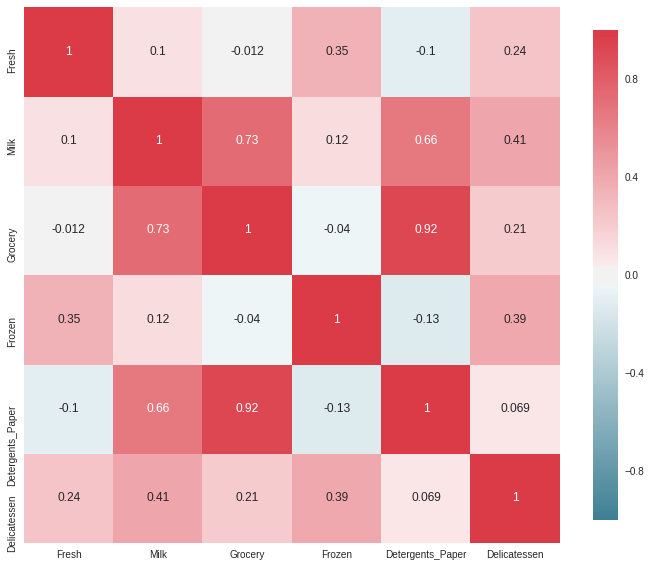

In [209]:
# Visualisation
#import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map( data )

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [210]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,116,421]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)



Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,11173,2521,3355,1517,310,222
2,17063,4847,9053,1031,3415,1784


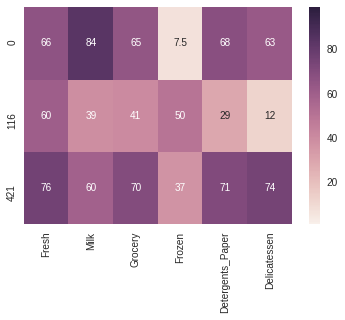

In [211]:
import seaborn as sns
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- Choice 1 (index = 0): **Cafe** 

    - Fresh: 66 %
    - Milk: 84 %
    - Grocery: 65 %
    - Frozen: 7.5 %
    - Detergents Paper: 68 %
    - Delicatessen: 63 %
    
- Choice 1 (index = 116): **Grocery **  

    - Fresh: 60%
    - Milk:39%
    - Grocery:41%
    - Frozen:50%
    - Detergents Paper:29%
    - Delicatessen:12%
    
- Choice 1 (index = 421): ** Market**

    - Fresh:76%
    - Milk:60%
    - Grocery:70%
    - Frozen:37%
    - Detergents Paper:71%
    - Delicatessen:74%


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
target = data['Grocery']
X_train, X_test, y_train, y_test = train_test_split(new_data, target,test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
print regressor.score(X_test, y_test)


0.712201603871


## RANKING/FILTER ATTRIBUTE SELECTION WITH TRAIN / TEST

In [213]:
#from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
# Attribute selection methods from sklearn
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif,f_regression

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print metrics.mean_squared_error(y_test, y_test_pred)

15099084.7545


In [214]:
%matplotlib inline
# We want to rank all attributes, and the best ones will be selected later
selector = SelectKBest(f_regression, k="all")
selector.fit(X_train, y_train)
sorted_attributes = np.argsort(-selector.scores_)
sorted_scores = np.sort(-selector.scores_)
lst = [new_data.columns[sorted_attributes[i]] for i in range(0,5)]
for index,element in enumerate(zip(lst, sorted_scores)):
    print element
    if index>10: break
#plt.plot(-sorted_scores)
#plt.show()

('Detergents_Paper', -2274.6163931590918)
('Milk', -370.32018325837913)
('Delicatessen', -12.048966077285815)
('Frozen', -0.066935246498590853)
('Fresh', -0.0013817365242905302)


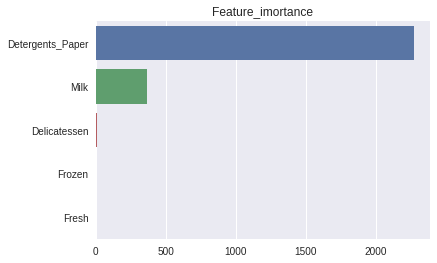

In [215]:
t = zip(lst, sorted_scores)
xtest =[ -t[i][1]for i in range(5)]
ytest =[  t[i][0]for i in range(5)]

plt.figure()
plt.axes().set_title("Feature_imortance")
sns.barplot(x=xtest,y=ytest)


In [216]:
from sklearn.pipeline import Pipeline
param_grid = {'feature_selection__k': np.arange(X_train.shape[1])+1,
              'regression__max_depth': np.arange(4)+1}
clf = Pipeline([('feature_selection', SelectKBest(f_regression)),
                ('regression', tree.DecisionTreeRegressor())])
clf_grid = GridSearchCV(clf, param_grid,scoring='mean_squared_error', 
                        cv=5 , n_jobs=1, verbose=1)
X, y = new_data, target
%time _ = clf_grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/hom

CPU times: user 904 ms, sys: 132 ms, total: 1.04 s
Wall time: 852 ms


In [217]:
print clf_grid.best_params_, clf_grid.best_score_

{'feature_selection__k': 2, 'regression__max_depth': 4} -18432243.9182


In [218]:
clf_grid.grid_scores_.sort(key=lambda(x): -x[1])
clf_grid.grid_scores_[0:10]

[mean: -18432243.91825, std: 6485560.67871, params: {'feature_selection__k': 2, 'regression__max_depth': 4},
 mean: -18688745.70573, std: 6439703.97965, params: {'feature_selection__k': 3, 'regression__max_depth': 4},
 mean: -18857576.08444, std: 6664639.59421, params: {'feature_selection__k': 4, 'regression__max_depth': 4},
 mean: -19120616.99991, std: 6632947.83542, params: {'feature_selection__k': 5, 'regression__max_depth': 4},
 mean: -19722228.32387, std: 6779092.75183, params: {'feature_selection__k': 1, 'regression__max_depth': 4},
 mean: -20807303.56708, std: 9489692.60635, params: {'feature_selection__k': 2, 'regression__max_depth': 3},
 mean: -20807303.56708, std: 9489692.60635, params: {'feature_selection__k': 3, 'regression__max_depth': 3},
 mean: -20807303.56708, std: 9489692.60635, params: {'feature_selection__k': 4, 'regression__max_depth': 3},
 mean: -21012524.04054, std: 9672277.82484, params: {'feature_selection__k': 1, 'regression__max_depth': 3},
 mean: -21227131.45

# 2 main differences between classification and regression trees

## Difference 1: When to use classification vs regression tree

This might seem like a trivial issue - once you know the difference! Classification trees, as the name implies are used to separate the dataset into classes belonging to the response variable. Usually the response variable has two classes: Yes or No (1 or 0). If the target variable has **more** than 2 categories, then a variant of the algorithm, called C4.5, is used. For binary splits however, the standard CART procedure is used. Thus classification trees are used when the response or target variable is categorical in nature.

**Regression trees** are needed when the response variable is numeric or continuous. For example, the predicted price of a consumer good. Thus regression trees are applicable for prediction type of problems as opposed to classification.

Keep in mind that in either case, the predictors or independent variables may be categorical or numeric. It is the **target variable** that determines the type of decision tree needed. 

## Difference 2: How they work

In a regression tree the idea is this: since the target variable does not have classes, we fit a regression model to the target variable using each of the independent variables. Then for each independent variable, the data is split at several split points. At each split point, the "error" between the predicted value and the actual values is squared to get a "Sum of Squared Errors (SSE)". The split point errors across the variables are compared and the variable/point yielding the lowest SSE is chosen as the root node/split point. This process is recursively continued.

http://www.simafore.com/blog/bid/62482/2-main-differences-between-classification-and-regression-trees




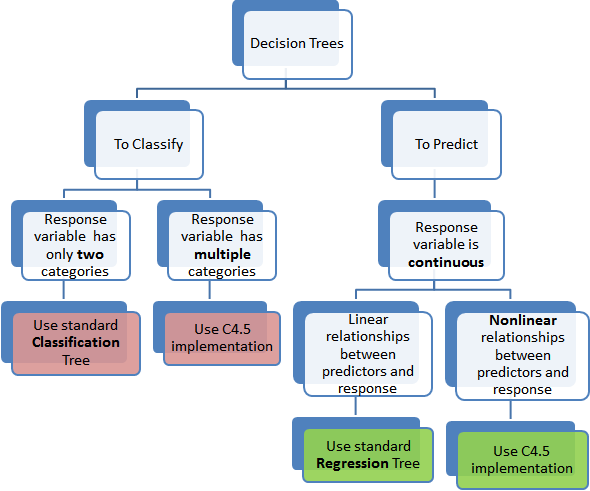

In [219]:
from IPython.display import Image
Image('which-type-of-decision-tree-to-use.png',width=500, height=500)

# Decision Tree - Regression

Decision tree builds regression or classification models in the form of a tree structure. It brakes down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

http://chem-eng.utoronto.ca/~datamining/dmc/decision_tree_reg.htm

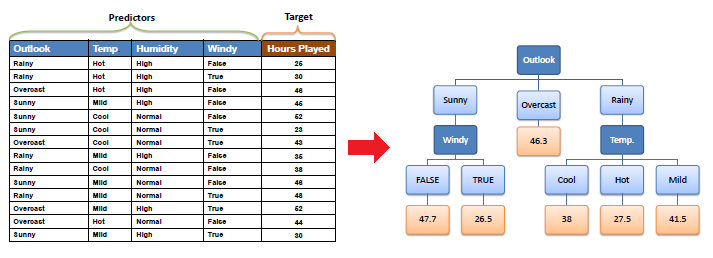

In [220]:
Image('Decision_tree_r1.png',width=1000, height=1000)

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

RANDOM_STATE = 101

for col in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(col, axis=1)
    new_feature = data[col]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=RANDOM_STATE)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=RANDOM_STATE)
    regressor.fit(X_train, y_train)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(col, score))

R2 score for Fresh as dependent variable: -1.22555174647
R2 score for Milk as dependent variable: 0.295714384441
R2 score for Grocery as dependent variable: 0.636071739623
R2 score for Frozen as dependent variable: -0.357984535053
R2 score for Detergents_Paper as dependent variable: 0.689552261594
R2 score for Delicatessen as dependent variable: 0.135562948847


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 
Each feature is tested within the loop, and if we see a low R^2 score, meaning the model fails to fit the data, because the dropped feature could not be represented by other features, and thus the dropped feature IS necessary for identifying customers' spending habits.

We could see "fresh", "frozen" and "deli" have negative R^2 score; "milk", "detergents_paper" have low positive R^2 score compared to that of "grocery". In a word, except "grocery", the remaining five features are necessary for identifying customers' spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

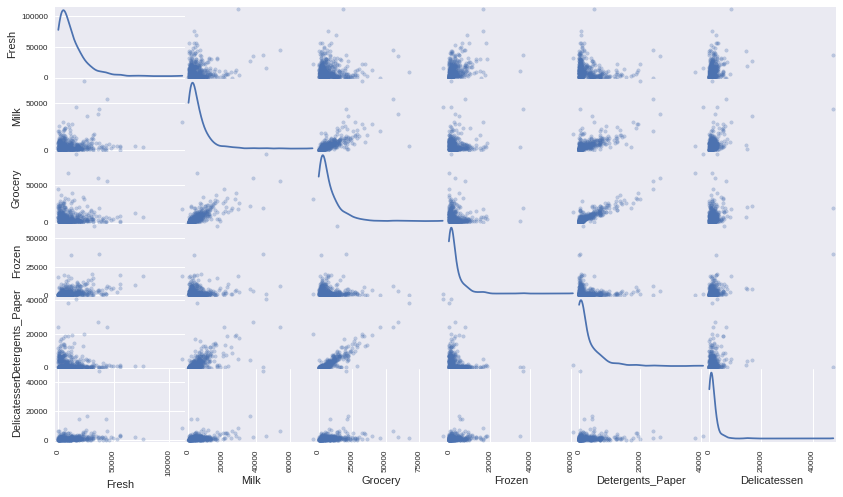

In [222]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

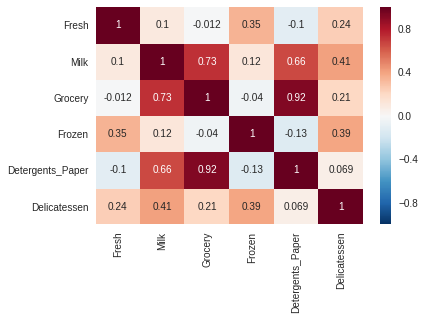

In [223]:
sns.heatmap(data.corr(), annot=True)

**Answer:**

- Milk and Detergent_Paper 66%
- Milk and Grocery 73 %
- Grocery Detergent_Paper 0.92%



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

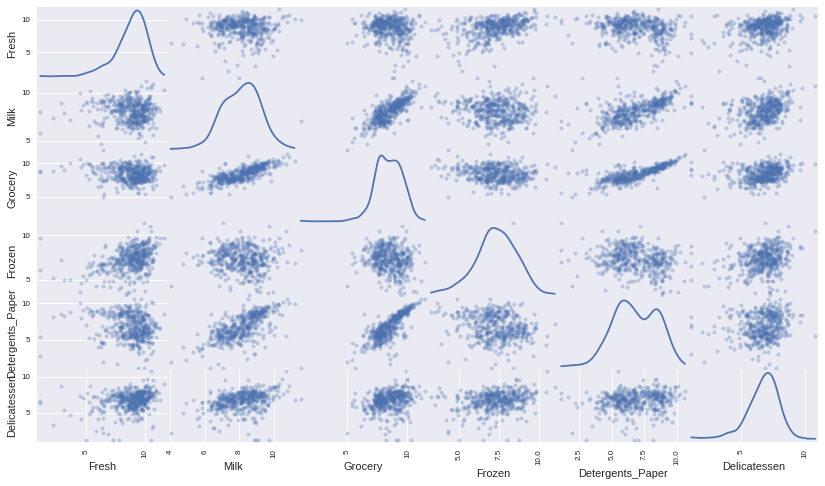

In [224]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [225]:
#g = sns.PairGrid(log_data)
#g.map_diag(sns.kdeplot)
#g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

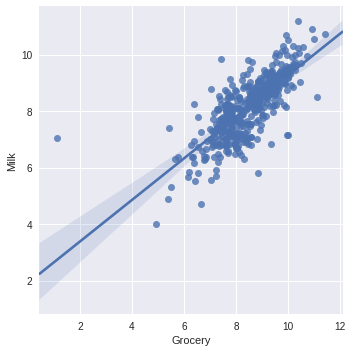

In [226]:
plt.figure(figsize = (11,7))
#sns.jointplot("Grocery", "Milk", data=log_data, kind='kde')
sns.lmplot("Grocery", "Milk", data=log_data )

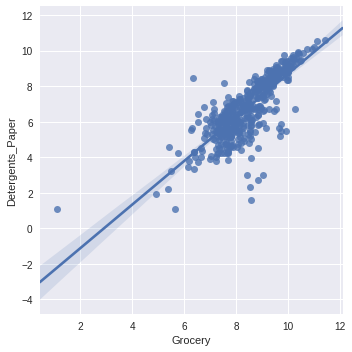

In [227]:
plt.figure(figsize = (11,7))
sns.lmplot("Grocery", "Detergents_Paper", data=log_data )
#sns.jointplot("Grocery", "Detergents_Paper", data=log_data, kind='kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [228]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,9.321255,7.832411,8.118207,7.324490,5.736572,5.402677
2,9.744668,8.486115,9.110851,6.938284,8.135933,7.486613


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [229]:
outliers  = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print "Outlier step:", step
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
#    feature_outliers = display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
#    outliers += feature_outliers.index.tolist()
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    outliers += feature_outliers.index.tolist()
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Number of outliers (inc duplicates): ", len(outliers)
print "New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape)

Outlier step: 2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outlier step: 2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier step: 2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier step: 2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outlier step: 4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier step: 2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Number of outliers (inc duplicates):  48
New dataset with removed outliers has 398 samples with 6 features each.


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

- 54: An outlier for Delicatessen, Milk and Grocery.
- 128: An outlier for Delicatessen and Fresh.
- 75: An outlier for Detergents_Paper and Grocery.
- 66: An outlier for Delicatessen and Fresh
- 65: An outlier for Frozen and Fresh


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

(3, 6)
(3, 6)


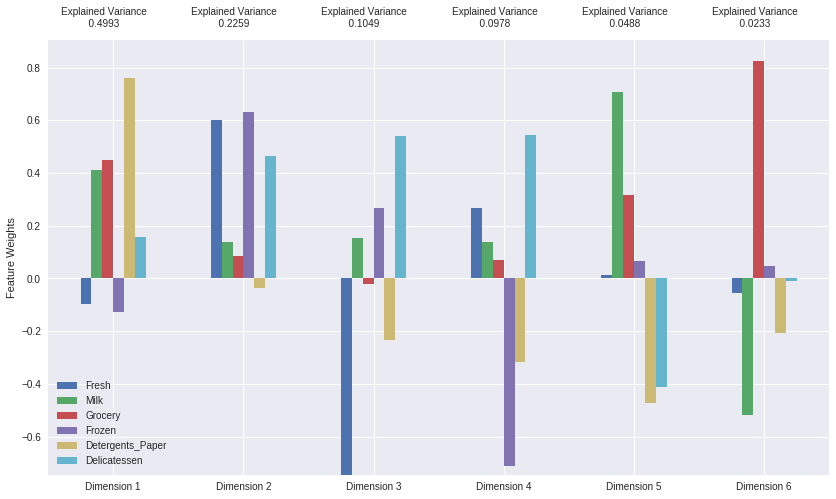

In [230]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca =  PCA(n_components=6) 
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
print log_samples.shape
print pca_samples.shape
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [231]:
display(pca_results['Explained Variance'])
display(pca_results['Explained Variance'].cumsum())


Dimension 1    0.4993
Dimension 2    0.2259
Dimension 3    0.1049
Dimension 4    0.0978
Dimension 5    0.0488
Dimension 6    0.0233
Name: Explained Variance, dtype: float64

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

**Answer:**

- First 2 components:
- 1st PC: 49.9%
- 2nd PC: 22.6%
- Total: 72.5%
- First 4 components:
- 3rd PC: 10.5%
- 4th PC: 9.8%
- Total: 92.8%

Each component represents different sections of customer spending

**1st PC** represents a wide variety of the featureset. Most prominently it represents Detergents_Paper, but also provides information Gain for Milk, Grocery and Delicatassen to some extent. However, it badly predicts Fresh and Frozen categories and needs another component to help. This could represent the 'convenience' or 'supermarket' spending category.

**2nd PC **allows for the recovery of Information Gain for Fresh and Frozen features, and supplements Delicatessen. It provides small gains for Milk and Grocery, and a very small loss of Detergents_Paper. This could represent customers who are in the hospitality or restaurant industry.

**3rd PC** represents gains for Fresh and Detergents_Paper, and minimal or losses for other categories. This could represent smaller corner shops, with convenience items and small amounts of groceries.


**4th PC** represents Frozen and Detergents_Paper, and losses for other categories. This could represent bulk buyers of frozen goods, such as fish importers.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [232]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7793,-0.6604,-0.8247,1.6580,0.0903,-0.4808
1,-1.2976,-0.5067,-0.8669,-0.3127,0.7708,0.1069
2,1.5782,0.5540,-0.6384,0.6134,-0.4660,0.0292


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [233]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)
print 'Shape of data before transform:', good_data.shape
print 'Shape of data after transform: ', reduced_data.shape
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

Shape of data before transform: (398, 6)
Shape of data after transform:  (398, 2)


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

,Dimension 1,Dimension 2
0,1.7793,-0.6604
1,-1.2976,-0.5067
2,1.5782,0.5540


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


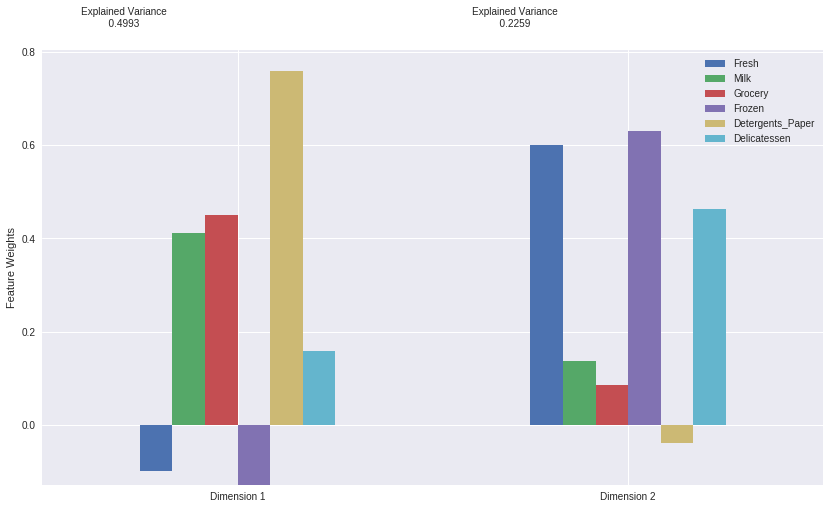

In [234]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
vs.pca_results(good_data, pca)

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

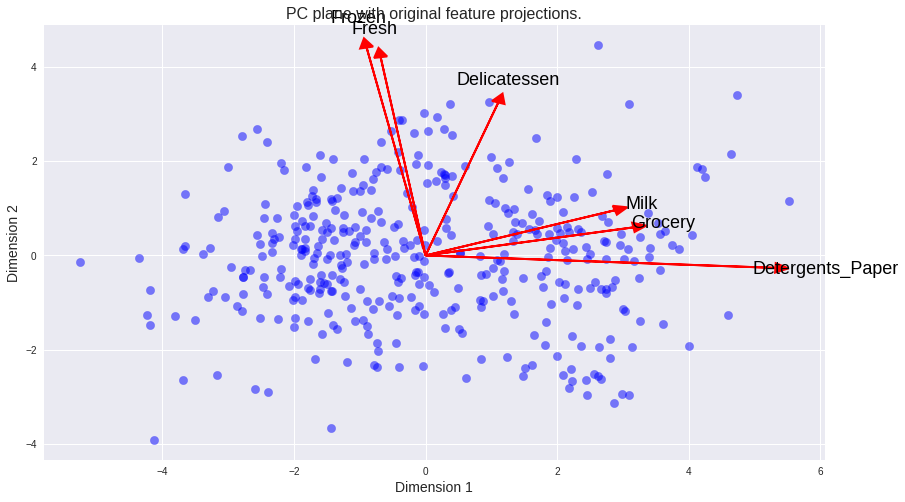

In [235]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

### K-Means Clustering Algorithm
**Intuition:** points in the same cluster has shorter than points from other clusters. The goal is to minimize the distance within the same cluster. Hard assignment, points belong explicitly to clusters

**Advantages:** Easy to understand and implement. Works well in practice.
K-Means is generally faster and more scalable to higher numbers of points and clusters.

### Gaussian Mixture Model
Soft assignment, there is no definite assignment of points to clusters. Points have probabilities of belonging to clusters.

**Advantages:** There is greater flexibility due to clusters having unconstrained covariances. In fact, K-means is a special case of the Gaussian Mixture Model. It allows mixed memberships. Due to the nature of soft assignments, a point can belong to two clusters with varying degree (probability).

 Gaussian Mixtures can handle 'fuzzy' cases, where categories might begin to blend together, as they are inherently probabilistic rather than absolute distributions.

The customers in the dataset should have discrete and rather distinct needs, and this is reflected in the sometimes sharp contrasts between customers in terms of how their spending is distributed among the categories. Some customers may no doubt present edge-cases, falling between the established clusters, or even blend together well past the boundaries, but given how the data were generated, we should assume the data tells us something deeper about how customers operate. A larger restaurant may indeed have needs more similar to those of a retailer than those of a smaller restaurant, for example, and so it may be beneficial for our algorithm to give us a discrete, definite cut-off so we can see just where needs shift significantly. I adopt Gaussian Mixture Model.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [236]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

def produceGMM(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_ 
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score = produceGMM(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)


/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

Number of Clusters,Silhouette Score
2,0.443601
3,0.357295
4,0.291646
5,0.265822
6,0.307123
7,0.295333
8,0.301156
9,0.283717
10,0.262954
11,0.216130


In [237]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2, random_state=0)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_ 

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
# Print the score result
print "The silhouette_score is: {}".format(score)

/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


The silhouette_score is: 0.443601474015


/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/pourya/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/pourya/anaconda2/lib/python2.7/site-packages

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** cluster 2

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

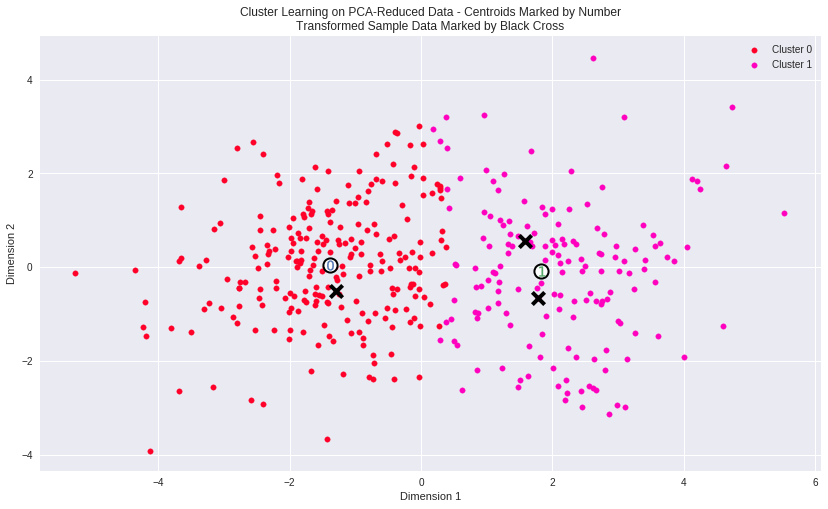

In [238]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [239]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

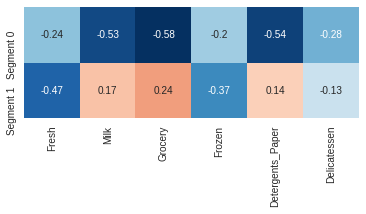

In [240]:
sns.heatmap((true_centers-data.mean())/data.std(ddof=0),
            square=True, annot=True, cbar=False)

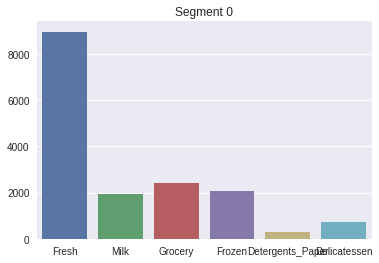

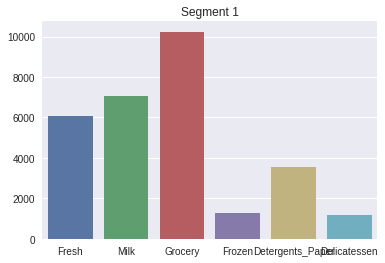

In [241]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)

**Answer:**
Cluster/Segment 0: This most likely represents cafes/restaurants serving fresh food due to the strong weight upon the Fresh category. Whilst the volume falls below the overall population mean, it is consistent with the original prediction for what a Restaurant might look like in the Data Explotation section.

Cluster/Segment 1: The quantities of Grocery and Milk are predominant here. The Milk and Grocery values in this cluster exceed the overall means observed in the Data Exploration section, which suggests the are bulk distributors or large resellers such as supermarkets.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [242]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [244]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,11173,2521,3355,1517,310,222
2,17063,4847,9053,1031,3415,1784


**Answer:**

- Sample 0: Have high consumption on Milk, Fresh and Detergents_Paper, and thus predicted to be in Cluster 1 makes sense.

- Sample 1: Have low consumption on Delicatessen, Detergents_Paper, and thus predicted to be in Cluster 0 makes sense.

- Sample 2: Have high consumption on Fresh and Grocery, and thus predicted to be in Cluster 1 makes sense.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

- The model has established two main customer types - Cluster 1 'supermarkets'/'bulk distributors' (who stock lots of different items) and Cluster 0 'restaurants/cafes' who stock fresh food.

- It is likely that customers from Cluster 0 who serve lots of fresh food are going to want 5-day weeks in order to keep food as fresh as possible

- Cluster 1 could be more flexible - they buy a more wide variety of perishable and non-perishable goods so do not necessarilly need a daily delivery.

With this in mind, the Company could run A/B tests and generalize. By picking a subset customers from each Cluster, they can evaluate feedback seperately. It could be established whether changing the delivery service is critical to each segment, and whether customers are happy with the change.

If a trend is found in a particular cluster, it allows a business to make educated and targeted decisions that would benefit their customers going forward depending on their profile. This is as opposed to which would generalize the entire customer-base.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- We can use semi-supervised techniques to classify new customers:
By first running an unsupervised clustering approach, such as GMM, we first establish clusters and use this as a new feature - which cluster they are in. We can call this feature 'Customer Segment', and they could be assigned abritrary enumerated values e.g. 0 and 1 for this worksheet.

- We'd then create new data points for each new customer, with all of their spending estimates. We can then use a Supervised learning technique, for example a Support Vector Machine (which does very well to seperate classified clusters) with a target variable of 'Customer Segment'

- Standard Supervised Learning optimizations could be used to tune the model - boosting, cross-validation etc

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

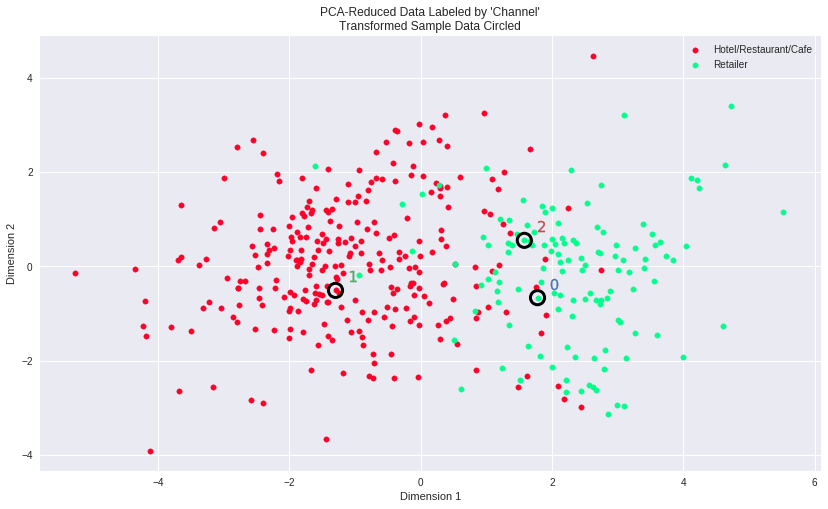

In [243]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

- The actual data appears to correlate very strongly with our predicted clusters earlier. It shows that the GMM clustering was able to establish the key relationships very well. It wasn't able to capture some of the more anamolous data points - particularly Retailers lying within the Hotel/Restaurant/Cafe cluster.

- The actual distribution has a less well defined seperation between clusters, but it can be stated with reasonable confidence that datapoints with a very positive 1st PC (4<) and 2nd PC (2<) are most certainly a Retailer. Data points with a very negative 1st PC (<-2) and 2nd PC (<-1)

- Yes, they are almost exactly the guesses I made regarding their classification - Cluster 0 I thought to be Restaurants/Cafes (I didn't consider hotels) and Cluster 1 being Bulk Distributor or Supermarkets, which is analagous to retailers.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.